In [1]:
import os
print(os.listdir('../'))
print(os.listdir('../input'))
print(os.listdir('../input/natural_images/'))

['lib', 'input', 'share', 'etc', 'files', 'include', 'bin']
['natural_images']
['dog', 'person', 'fruit', 'flower', 'car', 'airplane', 'motorbike', 'cat']


## Defining important values to be used

In [2]:
#batch_size
batchSize = 50

#epochs
epochSize = 50

#image_dimensions
dim1 = dim2 = 256

In [3]:
#importing Keras and other required features
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


# Setting-Up Neural Network Layers

In [4]:
#initializing Sequential Model
model = Sequential()

#Adding 1st CNN layer
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(dim1, dim2, 3)))

#Adding 1st MaxPool Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Adding other layers
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening into Single 1D List
model.add(Flatten())

W0706 19:39:26.305251 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 19:39:26.555507 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 19:39:26.637474 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 19:39:26.733722 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf

In [5]:
#hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))

#final output layer
model.add(Dense(8, activation='softmax'))

#model summary
model.summary()

W0706 19:39:28.363542 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0706 19:39:28.372215 139797364959040 deprecation.py:506] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
__________

In [6]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

W0706 19:39:42.404978 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 19:39:42.433992 139797364959040 deprecation_wrapper.py:119] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Image Preprocessing and Model-Training

In [7]:
# importing modules
from keras.preprocessing.image import ImageDataGenerator

In [8]:
img_data_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
)

In [9]:
train_generator = img_data_generator.flow_from_directory(
        '../input/natural_images/',
        target_size=(dim1, dim2),
        batch_size=batchSize,
        subset='training'
)

validation_generator = img_data_generator.flow_from_directory(
        '../input/natural_images/',
        target_size=(dim1, dim2),
        batch_size=batchSize,
        subset='validation'
)

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


### INDICES

In [10]:
train_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [11]:
history = model.fit_generator(
            train_generator,
            #total_no_tarinSamples / batch_size
            steps_per_epoch=(5522 / batchSize),
            epochs=epochSize,
            validation_data=validation_generator,
            #total_no_validationSamples / batch_size
            validation_steps=(1377 / batchSize)
)

W0706 19:39:54.456237 139797364959040 deprecation.py:323] From /home/divyam/Desktop/Image-CNN/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
111/110 [==============================] - 336s 3s/step - loss: 1.9690 - acc: 0.2353 - val_loss: 1.7191 - val_acc: 0.3972
Epoch 2/50
111/110 [==============================] - 328s 3s/step - loss: 1.6359 - acc: 0.4009 - val_loss: 1.4858 - val_acc: 0.4815
Epoch 3/50
111/110 [==============================] - 324s 3s/step - loss: 1.4103 - acc: 0.4894 - val_loss: 1.3261 - val_acc: 0.5802
Epoch 4/50
111/110 [==============================] - 334s 3s/step - loss: 1.2052 - acc: 0.5739 - val_loss: 1.0636 - val_acc: 0.6442
Epoch 5/50
111/110 [==============================] - 322s 3s/step - loss: 1.0620 - acc: 0.6167 - val_loss: 0.9168 - val_acc: 0.6805
Epoch 6/50
111/110 [==============================] - 315s 3s/step - loss: 0.9503 - acc: 0.6577 - val_loss: 1.0666 - val_acc: 0.6187
Epoch 7/50
111/110 [==============================] - 317s 3s/step - loss: 0.8371 - acc: 0.6943 - val_loss: 0.8786 - val_acc: 0.6855
Epoch 8/50
111/110 [==============================] - 313s 3s/step - 

<hr>

## Visualize

In [13]:
#importing matplotlib to plot graphs
import matplotlib.pyplot as plt

#assigning values to respective variables
acc = history.history['acc']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
loss = history.history['loss']
nos_epochs = range(len(acc))

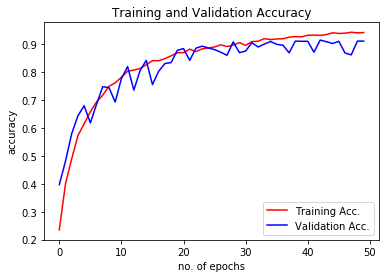

In [15]:
plt.plot(nos_epochs, acc, color='red', label='Training Acc.')
plt.plot(nos_epochs, val_acc, color='blue', label='Validation Acc.')
plt.title('Training and Validation Accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

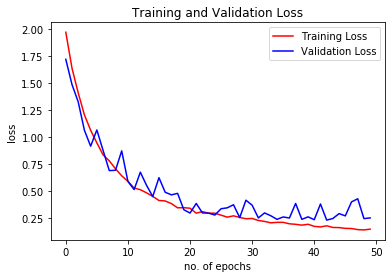

In [16]:
plt.plot(nos_epochs, loss, color='red', label='Training Loss')
plt.plot(nos_epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('no. of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
#saving entire model
model.save('entire_model.h5')

In [18]:
#Model Architecture & Weights
from keras.models import model_from_json

# model architecture to JSON
with open("model_architecture.json", "w") as f:
    f.write(model.to_json())
    
# model weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


## END OF CODE